In [4]:
from PIL import Image
import os
import numpy as np

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
gpus = tf.config.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
labels = {
    "PNEUMONIA":1,
    "NORMAL":0
}
img_x, img_y = 256,256

# Dataset Creation

In [5]:
train_path = "../data/train/"
X_train = []
y_train = []
for label_name,label in labels.items():
    path = f"../data/train/{label_name}/"
    dir_list = os.listdir(path)
    y_train.append(np.full(len(dir_list),label))
    for img_name in dir_list:
        im = Image.open((path+img_name)).convert('L')
        im = im.resize((img_x, img_y))
        im = np.array(im)
        X_train.append(im)
y_train = np.hstack([y_train[0],y_train[1]])
X_train = np.array(X_train)

In [28]:
test_path = "../data/test/"
X_test = []
y_test = []
for label_name,label in labels.items():
    path = f"../data/test/{label_name}/"
    dir_list = os.listdir(path)
    y_test.append(np.full(len(dir_list),label))
    for img_name in dir_list:
        im = Image.open((path+img_name)).convert('L')
        im = im.resize((img_x, img_y))
        im = np.array(im)
        X_test.append(im)
y_test = np.hstack([y_test[0],y_test[1]])
X_test = np.array(X_test)

In [29]:
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train, random_state=0)
X_train = X_train/255

X_test,y_test = shuffle(X_test,y_test, random_state=0)
X_test = X_test/255

In [45]:
X_train.shape

(5216, 256, 256)

# Modelin

In [41]:
from tensorflow import keras

modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(img_x, img_y)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1, activation='sigmoid'),
])

call_back = tf.keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True)

modelo.compile(optimizer='adam', 
               loss='binary_crossentropy',
               metrics=['accuracy'],
              )

historico = modelo.fit(X_train, y_train, epochs=100, callbacks=[call_back],validation_data=(X_test,y_test),workers=-1,use_multiprocessing=True)

Epoch 1/100
163/163 [==============================] - 3s 16ms/step - loss: 0.9386 - accuracy: 0.8754 - val_loss: 0.7806 - val_accuracy: 0.8173
Epoch 2/100
163/163 [==============================] - 2s 12ms/step - loss: 0.3863 - accuracy: 0.9158 - val_loss: 1.8427 - val_accuracy: 0.7308
Epoch 3/100
163/163 [==============================] - 2s 13ms/step - loss: 0.3824 - accuracy: 0.9191 - val_loss: 2.8314 - val_accuracy: 0.6875
Epoch 4/100
163/163 [==============================] - 2s 13ms/step - loss: 0.1965 - accuracy: 0.9415 - val_loss: 0.9227 - val_accuracy: 0.799780 
Epoch 5/100
163/163 [==============================] - 2s 13ms/step - loss: 0.2482 - accuracy: 0.9358 - val_loss: 1.6900 - val_accuracy: 0.7292
Epoch 6/100
163/163 [==============================] - 2s 15ms/step - loss: 0.2491 - accuracy: 0.9346 - val_loss: 1.0752 - val_accuracy: 0.7933
Epoch 7/100
163/163 [==============================] - 2s 12ms/step - loss: 0.2277 - accuracy: 0.9365 - val_loss: 0.9887 - val_accura

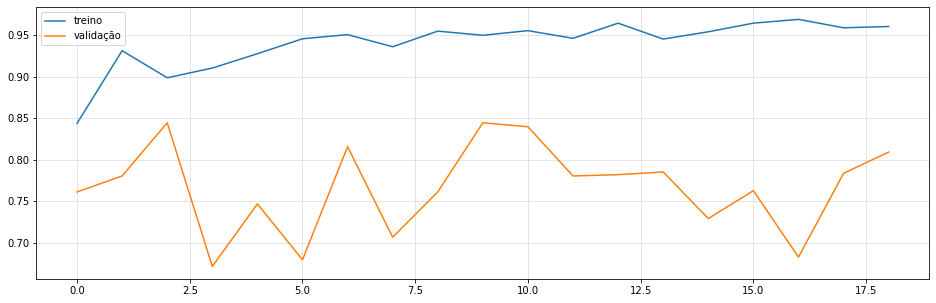

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))

plt.plot(historico.history['accuracy'],label='treino')
plt.plot(historico.history['val_accuracy'],label='validação')
plt.grid(alpha=0.4)
plt.legend()
plt.show()